## Gráficos Personalizados

No pacote `PhaseDiagram` existe a possibilidade de os gráficos serem personalizados. Essa personalização pode ser de plotar apenas uma das curvas, aumentar a expessura das curvas, mudar cores, plotar pontos personalizados, criar linhas na curva. Essa capacidade faz com que o usuário tenha maiores possibilidades no uso desse pacote.

Vamos importar o pacote.

In [1]:
from phase_diagram.phase_diagram import PhaseDiagram

Criando o objeto

In [2]:
water = PhaseDiagram('water')

Vamos ver o gráfico padrão que o pacote plota.

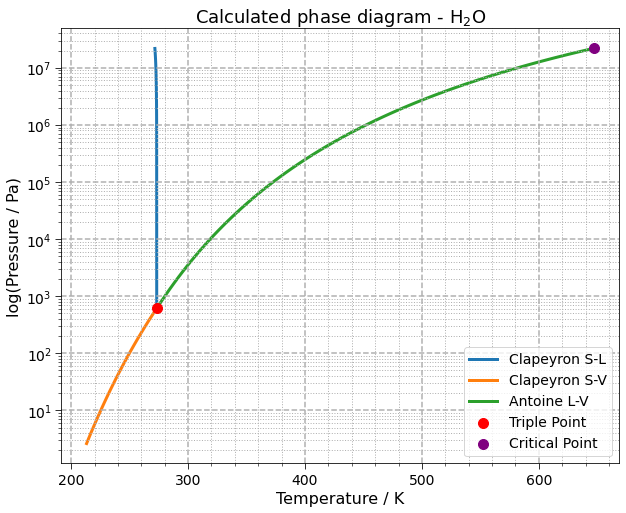

In [3]:
water.plot()

## Curvas padrões personalizadas

Vimos acima como o gráfico é por padrão, agora vamos ver cada curva especifica da água de forma isolada. Para criar essas curvas personalizadas nós criaremos tuplas, onde os dados estarão dentro de um dicionário. Nesse dicionário diremos qual curva que nós queremos e como queremos que ela tenha uma representação no gráfico, podendo alterar a cor, espessura da linha, entre outras coisas.

A sequência dos parametrôs passados serão:
* **data_tuple**: um conjunto de dados para a plotagem da curva
* **label**: a legenda da curva
* **kwargs**: parâmetros para a parte visual da curva

Todas as possíveis modificações do `kwargs` podem ser vistas na página do [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) do Matplotlib.

Vamos as curvas.

In [4]:
water_clapeyron_sl = ({'data_tuple': water.clapeyron_sl(),
                       'label': 'curva sólido-líquido da água',
                       'kwargs': {'color': 'gray',
                                  'linewidth': 3,
                                  'zorder': 1}},
            )

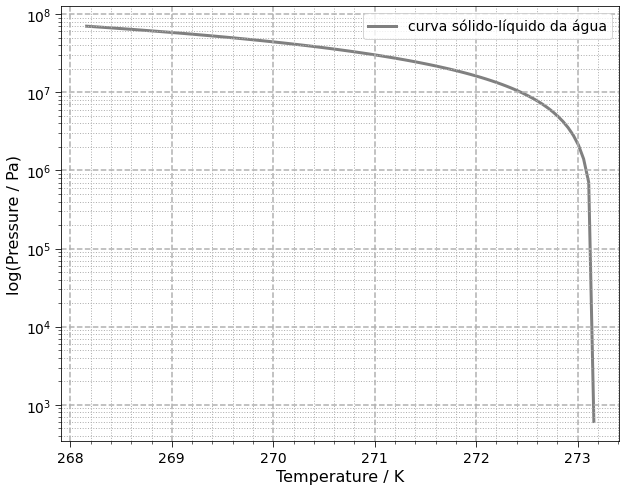

In [5]:
water.plot_custom(curves=(water_clapeyron_sl))

Se quisermos colocar títulos na figura, podemos passar o argumento `title_text=`

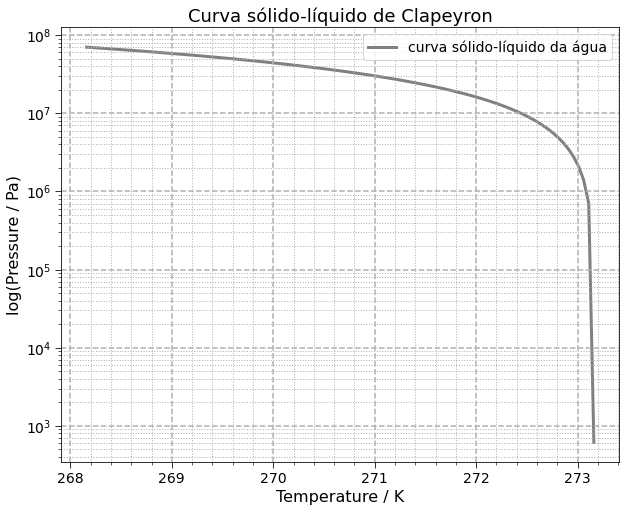

In [6]:
water.plot_custom(curves=(water_clapeyron_sl), title_text='Curva sólido-líquido de Clapeyron')

Para as outras curvas o código fica

In [7]:
water_clapeyron_sv = ({'data_tuple': water.clapeyron_sv(),
                       'label': 'curva sólido-vapor da água',
                       'kwargs': {'color': 'red',
                                  'linewidth': 3,
                                  'zorder': 1}},
            )

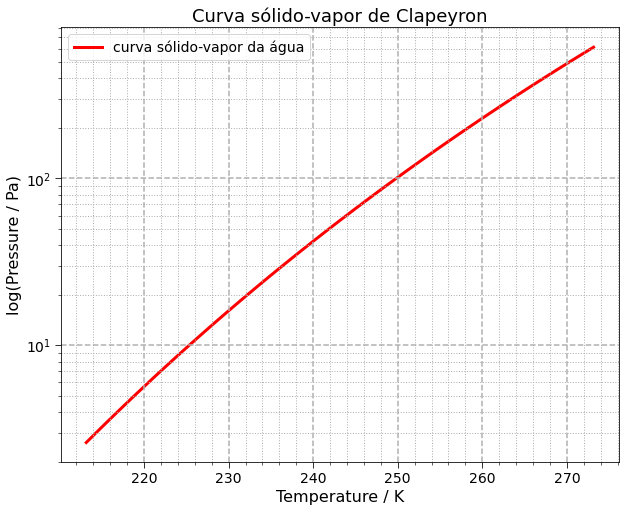

In [8]:
water.plot_custom(curves=(water_clapeyron_sv), title_text='Curva sólido-vapor de Clapeyron')

In [21]:
water_antoine_lv = ({'data_tuple': water.antoine_lv(),
                       'label': 'curva líquido-vapor de antoine da água',
                       'kwargs': {'color': 'magenta',
                                  'linewidth': 3,
                                  'zorder': 1}},
            )

water.plot_custom(curves=(water_antoine_lv), title_text='Curva líquido-vapor de Antoine')

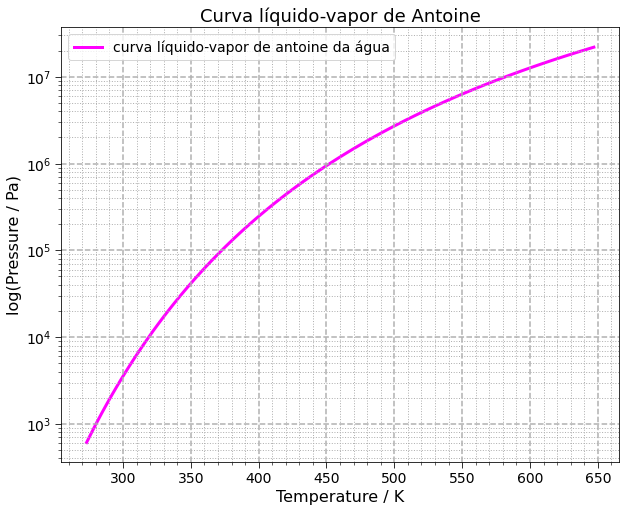

In [22]:
water.plot_custom(curves=(water_antoine_lv), title_text='Curva líquido-vapor de Antoine')

In [14]:
water_clapeyron_lv = ({'data_tuple': water.clapeyron_lv(),
                       'label': 'curva líquido-vapor de clapeyron da água',
                       'kwargs': {'color': 'black',
                                  'linewidth': 3,
                                  'zorder': 1,
                                  'linestyle': '--'}},
                                
            )

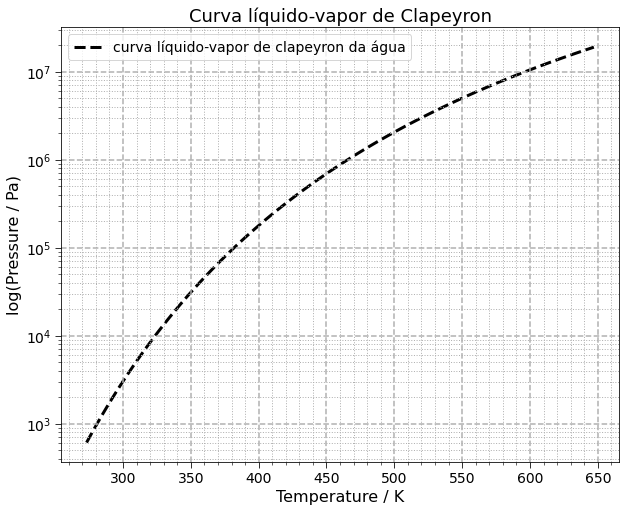

In [15]:
water.plot_custom(curves=(water_clapeyron_lv), title_text='Curva líquido-vapor de Clapeyron')

Juntando todas as curvas em um único gráfico.

In [19]:
water_plot_completo = ({'data_tuple': water.clapeyron_sl(),
                       'label': 'curva sólido-líquido da água',
                       'kwargs': {'color': 'gray',
                                  'linewidth': 3,
                                  'zorder': 1}},
                       {'data_tuple': water.clapeyron_sv(),
                       'label': 'curva sólido-vapor da água',
                       'kwargs': {'color': 'red',
                                  'linewidth': 3,
                                  'zorder': 1}},
                       {'data_tuple': water.antoine_lv(),
                       'label': 'curva líquido-vapor de antoine da água',
                       'kwargs': {'color': 'magenta',
                                  'linewidth': 3,
                                  'zorder': 1}},
                       {'data_tuple': water.clapeyron_lv(),
                       'label': 'curva líquido-vapor de clapeyron da água',
                       'kwargs': {'color': 'black',
                                  'linewidth': 3,
                                  'zorder': 1,
                                  'linestyle': '--'}},
            )

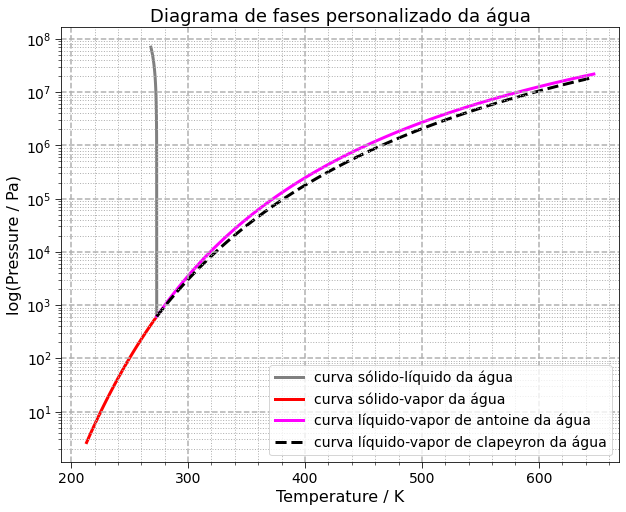

In [20]:
water.plot_custom(curves=(water_plot_completo), title_text='Diagrama de fases personalizado da água')

Vimos com os gráficos acima que é possível personalizar, já que vendo o último gráfico podemos perceber que esse diagrama de fases não possui os pontos triplo e crítico que são incluidos no `plot` padrão do pacote.

O método `plot_custom` retorna um objeto `matplotlib.axes._subplots.AxesSubplot`. Portando pode ser facilmente incluído em uma tela previamente criada por uma figura do Matplotlib. O `plot_custom` tem um parâmetro `ax` que específica o eixo que o gráfico será passado. Para criar a figura com todos os gráficos que vimos até agora em uma única tela usamos o método [figure](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html) do Matplotlib 

In [23]:
import matplotlib.pyplot as plt

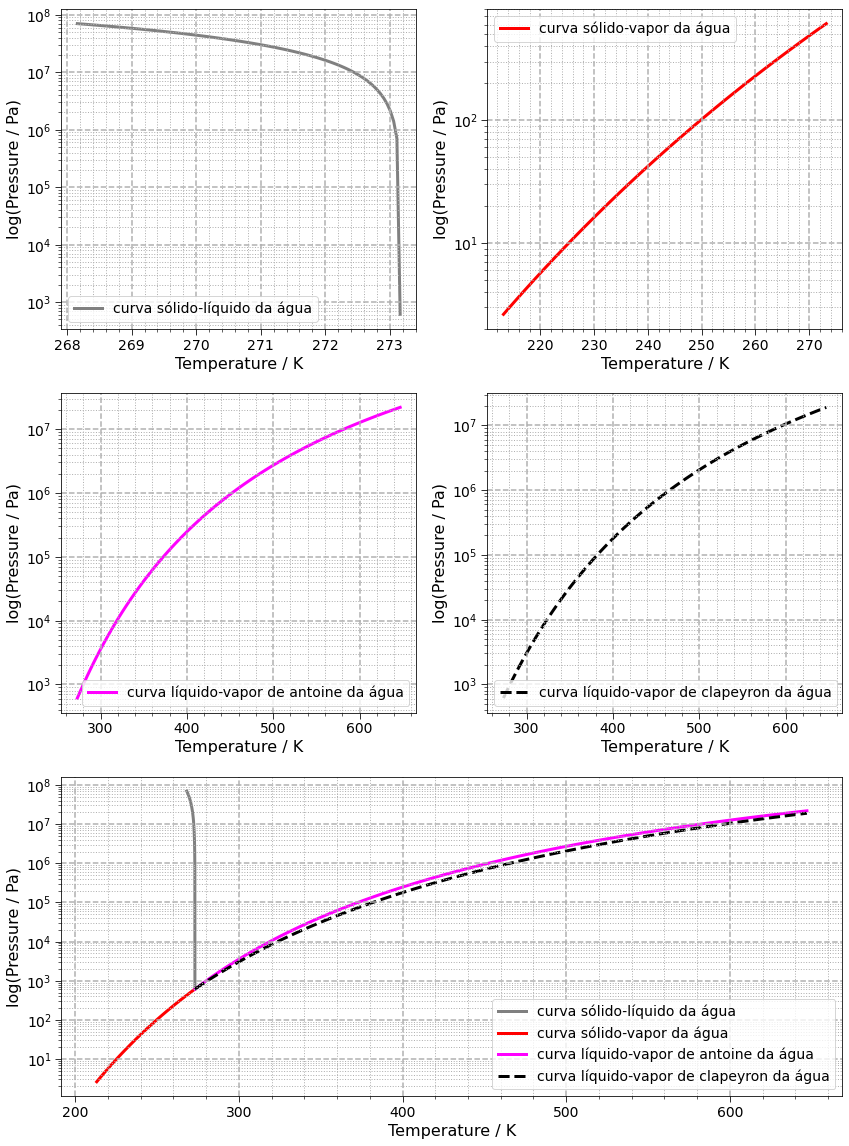

In [35]:
# criando figura
fig = plt.figure(figsize=(14, 20))

# criando eixos
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 1, 3)

water.plot_custom(curves=(water_clapeyron_sl), ax=ax1)
water.plot_custom(curves=(water_clapeyron_sv), ax=ax2)
water.plot_custom(curves=(water_antoine_lv), ax=ax3)
water.plot_custom(curves=(water_clapeyron_lv), ax=ax4)
water.plot_custom(curves=(water_plot_completo), ax=ax5)

## Curvas próprias personalizadas

Como visto no tópico anterior, podemos personalizar curvas prontas. Porém é póssivel criar nossas próprias curvas. Para criar as curvas é só seguir os mesmos pontos do tópico anterior. Usaremos o pacote [Numpy](https://numpy.org/) para a criação dos dados da curva.

In [53]:
import numpy as np
temp_press_amb = np.linspace(200, 700, 100) * water.ureg('K')
press_amb = np.full(len(temp), 1) * water.ureg('atm')

temp_amb= (298.15, 298.15) * water.ureg('K')
press_temp_amb = (10**2, 10**7)  * water.ureg('Pa')

In [54]:
minha_curva =({'data_tuple': (temp_press_amb, press_amb),
             'label': 'Pressão ambiente',
             'kwargs': {'color': 'red',
                        'linewidth': 3,
                        'linestyle': ':',
                        'zorder': 1}}, 
            {'data_tuple': (temp_amb, press_temp_amb),
             'label': 'Temperatura Ambiente',
             'kwargs': {'color': 'blue',
                        'linewidth': 3,
                        'linestyle': ':',
                        'zorder': 1}},)

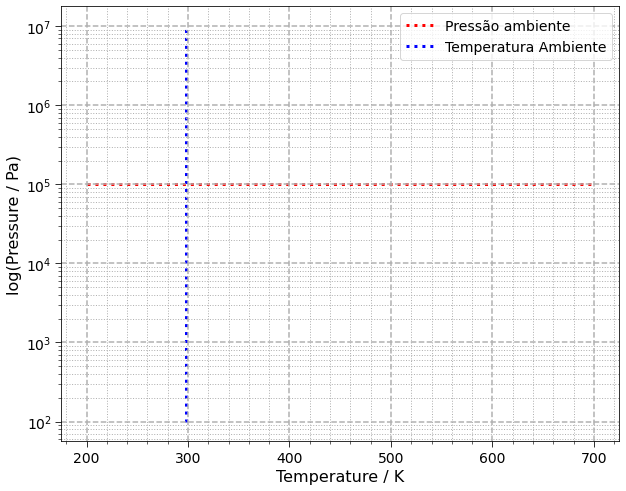

In [58]:
water.plot_custom(curves=minha_curva)

Como visto no código acima, podemos passar unidades diferentes que o pacote é capaz de converter para as mesmas unidades na hora da plotagem. Por padrão essa conversão será feita para Pascal em pressão e em Kelvin para temperatura.

Vejamos outro exemplo.

In [87]:
import numpy as np
x = np.arange(0, 300, 0.1)
y = np.exp(x) 

curva_x = x * water.ureg('K')
curva_y = y * water.ureg('Pa')

In [90]:
minha_curva_exponencial = ({'data_tuple': (curva_x, curva_y),
             'label': 'Curva exponencial',
             'kwargs': {'color': 'blue',
                        'linewidth': 3,
                        'linestyle': '-',
                        'zorder': 1}},)

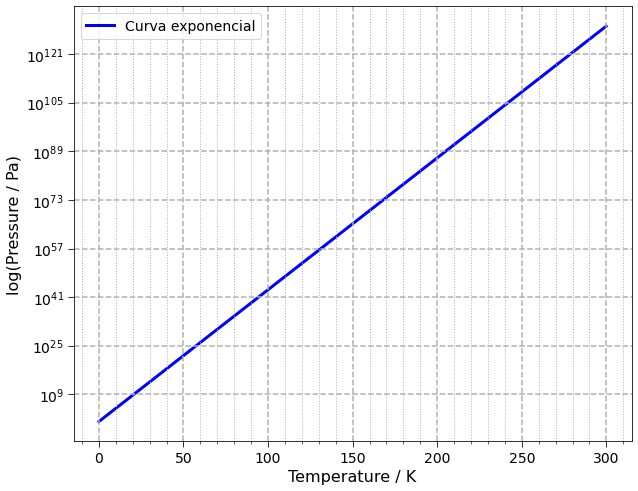

In [91]:
water.plot_custom(curves=minha_curva_exponencial)

Quando vemos o código e vemos o gráfico estranhamos, pois usamos uma função exponencial para criar a curva e deu uma função em escala logaritma. Isso se deve ao parâmetro `scale_log` que por padrão vem ativado(True). Para desativá-lo basta passar ao parâmetro `scale_log=False`

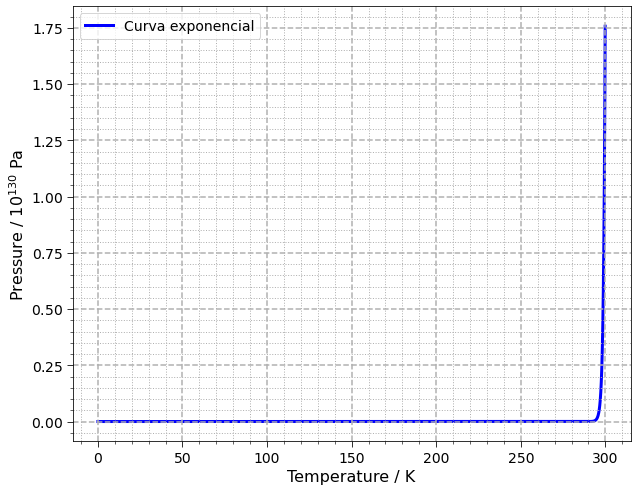

In [92]:
water.plot_custom(curves=minha_curva_exponencial, scale_log=False)

## Pontos  padrões personalizados

O pacote também permite que o usuário crie seus próprios pontos. A lógica dos pontos é a mesma das curvas. Nos pontos pode se variar o diâmetro deles, a cor, entre outras coisas. 

A sequência dos parametrôs passados serão:
* **data_tuple**: um conjunto de dados para a plotagem da curva
* **label**: a legenda da curva
* **kwargs**: parâmetros para a parte visual da curva

Todas as possíveis modificações do `**kwargs` podem ser vistas na página do [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) do Matplotlib

Vamos aos pontos.

In [101]:
meus_pontos = ({'data_tuple': water.triple_point,
             'label': 'Ponto Triplo',
             'kwargs': {'color': 'green',
                        's': 100,
                        'zorder': 2}},
            {'data_tuple': water.boiling_point,
             'label': 'Ponto de Ebulição',
             'kwargs': {'color': 'blue',
                        's': 50,
                        'zorder': 2}},
            {'data_tuple': water.critical_point,
             'label': 'Ponto Crítico',
             'kwargs': {'color': 'red',
                        's': 120,
                        'zorder': 2}},
             {'data_tuple': water.melting_point,
             'label': 'Ponto de Fusão',
             'kwargs': {'color': 'black',
                        's': 200,
                        'zorder': 2}},
              )

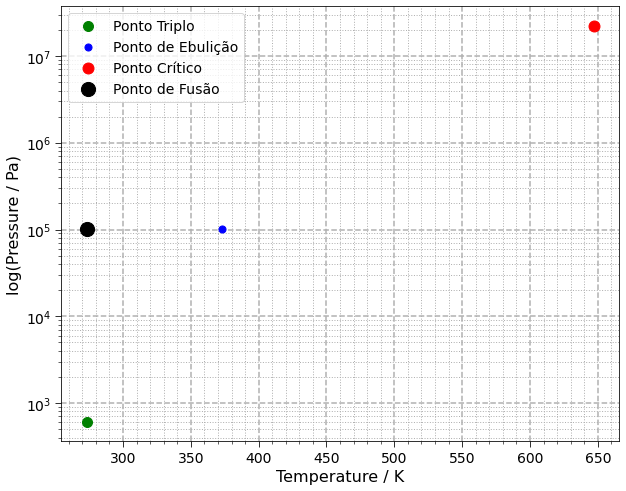

In [102]:
water.plot_custom(points=meus_pontos)

Também é possível colocarmos pontos com os gráficos.

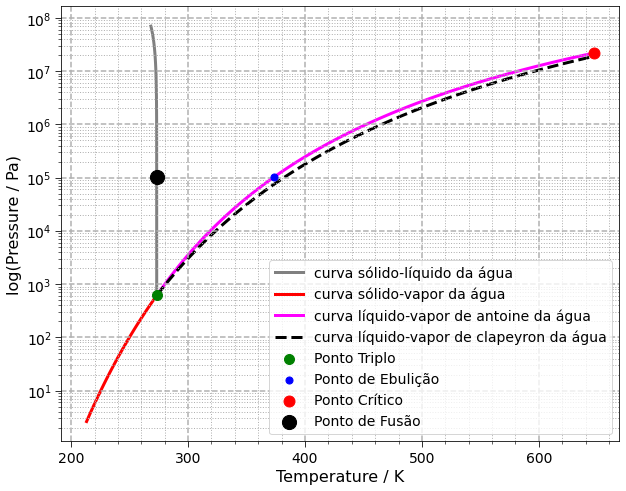

In [103]:
water.plot_custom(curves=(water_plot_completo), points=meus_pontos)

## Pontos próprios personalizados

Como no caso das curvas, os pontos também podem ser criados.

Vamos criar os pontos.

In [107]:
pressao = water.ureg('1 atm')
temperatura = water.ureg('298.15 K')

In [115]:
meus_pontos_personalizados = ({'data_tuple': (water.ureg('298.15 K'), water.ureg('1 atm')),
             'label': 'Meu ponto',
             'kwargs': {'color': 'black',
                        's': 120,
                        'zorder': 2}},)

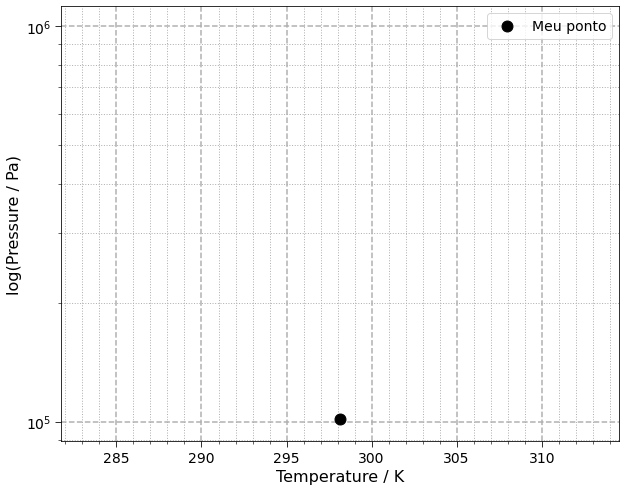

In [116]:
water.plot_custom(points=meus_pontos_personalizados)

Plotando junto a um gráfico

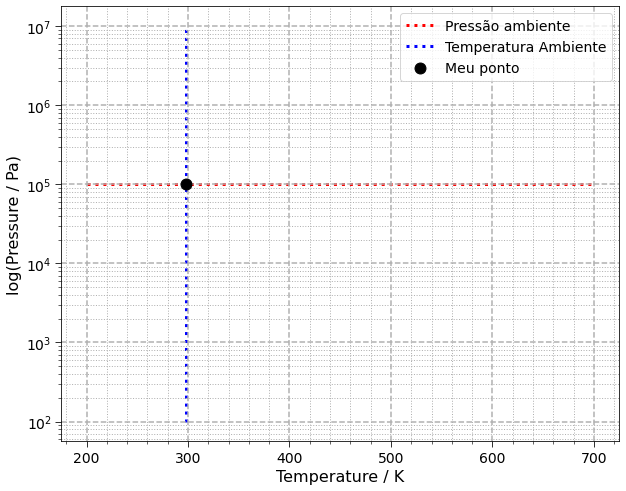

In [117]:
water.plot_custom(curves=minha_curva, points=meus_pontos_personalizados)

## Líquido-vapor de Antoine vs Líquido-vapor de Clausius-Clapeyron

A equação de Antoine é uma classe de correlações semi-empíricas que descreve a relação entre a pressão de vapor e a temperatura para substâncias puras. A equação de Antoine é derivada da relação Clausius-Clapeyron. Em físico-química e em outras ciências que utilizam o diagrama de fases, comumento se usa a curva líquido-vapor de Antoine, pois ela é mais precisa. 

Mostraremos a diferença entre ambas em alguns compostos e como poder utilizá-las. Para facilitar a vizualização da diferença, usaremos o ponto triplo e o ponto crítico como parâmetros para a exatidão.

### Água

In [121]:
water_liquido_vapor = ({'data_tuple': water.clapeyron_lv(),
                       'label': 'curva líquido-vapor de clapeyron da água',
                       'kwargs': {'color': 'black',
                                  'linewidth': 3,
                                  'zorder': 1,
                                  'linestyle': '--'}},
                       {'data_tuple': water.antoine_lv(),
                       'label': 'curva líquido-vapor de antoine da água',
                       'kwargs': {'color': 'magenta',
                                  'linewidth': 3,
                                  'zorder': 1}},
                                
            )

In [122]:
water_pontos = ({'data_tuple': water.triple_point,
             'label': 'Ponto Triplo',
             'kwargs': {'color': 'green',
                        's': 100,
                        'zorder': 2}},
            {'data_tuple': water.critical_point,
             'label': 'Ponto Crítico',
             'kwargs': {'color': 'red',
                        's': 120,
                        'zorder': 2}},
              )

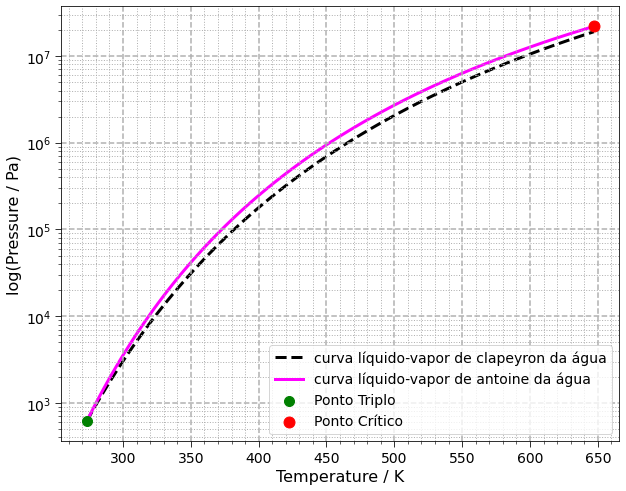

In [123]:
water.plot_custom(curves=water_liquido_vapor, points=water_pontos)

## Dióxido de carbono

In [126]:
co2 = PhaseDiagram('CO2')

In [127]:
co2_liquido_vapor = ({'data_tuple': co2.clapeyron_lv(),
                       'label': 'curva líquido-vapor de clapeyron do dióxido de carbono',
                       'kwargs': {'color': 'green',
                                  'linewidth': 3,
                                  'zorder': 1,
                                  'linestyle': '--'}},
                       {'data_tuple': co2.antoine_lv(),
                       'label': 'curva líquido-vapor de antoine do dióxido de carbono',
                       'kwargs': {'color': 'blue',
                                  'linewidth': 3,
                                  'zorder': 1}},
                                
            )

In [128]:
co2_pontos = ({'data_tuple': co2.triple_point,
             'label': 'Ponto Triplo',
             'kwargs': {'color': 'green',
                        's': 100,
                        'zorder': 2}},
            {'data_tuple': co2.critical_point,
             'label': 'Ponto Crítico',
             'kwargs': {'color': 'red',
                        's': 120,
                        'zorder': 2}},
              )

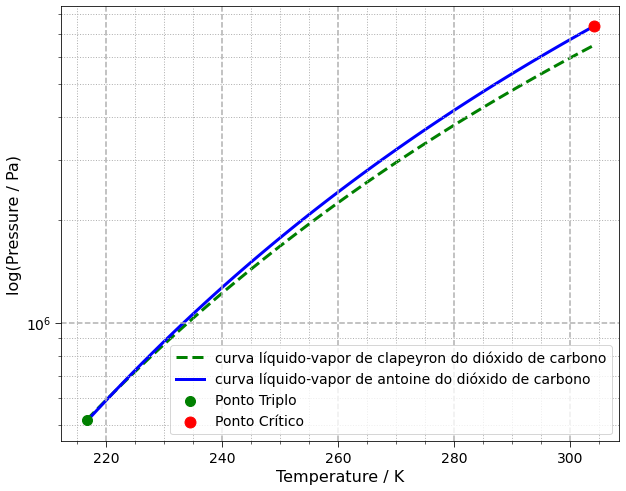

In [129]:
water.plot_custom(curves=co2_liquido_vapor, points=co2_pontos)

## Mercúrio

In [145]:
mercury = PhaseDiagram('mercury')

In [151]:
mercury_liquido_vapor = ({'data_tuple': mercury.clapeyron_lv(),
                       'label': 'curva líquido-vapor de clapeyron do mercúrio',
                       'kwargs': {'color': 'green',
                                  'linewidth': 3,
                                  'zorder': 1,
                                  'linestyle': '--'}},
                       {'data_tuple': mercury.antoine_lv(),
                       'label': 'curva líquido-vapor de antoine do mercúrio',
                       'kwargs': {'color': 'blue',
                                  'linewidth': 3,
                                  'zorder': 1}},
                                
            )

In [152]:
mercury_pontos = ({'data_tuple': mercury.triple_point,
             'label': 'Ponto Triplo',
             'kwargs': {'color': 'green',
                        's': 100,
                        'zorder': 2}},
            {'data_tuple': mercury.critical_point,
             'label': 'Ponto Crítico',
             'kwargs': {'color': 'red',
                        's': 120,
                        'zorder': 2}},
              )

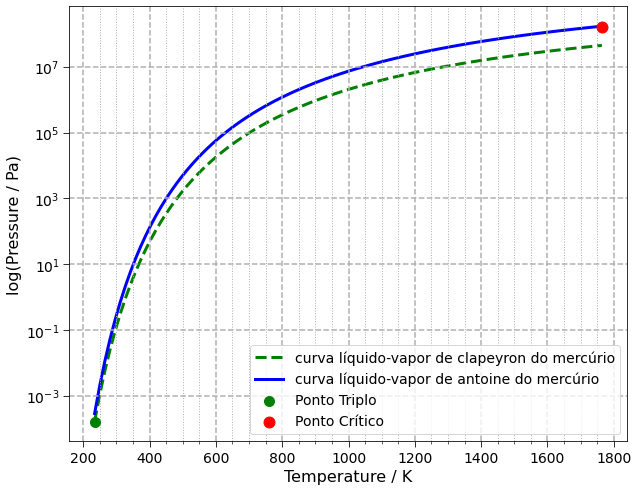

In [153]:
water.plot_custom(curves=mercury_liquido_vapor, points=mercury_pontos)